# EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import PIL
import numpy as np

## Check out the csv with data on the images

In [2]:
df = pd.read_csv('./data/train_ship_segmentations_v2.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231723 entries, 0 to 231722
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ImageId        231723 non-null  object
 1   EncodedPixels  81723 non-null   object
dtypes: object(2)
memory usage: 3.5+ MB


In [5]:
(81723 - 39167) / 192556

0.2210058372629261

Roughly 22% of the images have ships in them based on how many rows in the CSV contain encoded pixels

In [6]:
81723 - 39167

42556

In [5]:
df.head()

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...


It looks like there can be multiple entries for the `ImageId` column, which is how multiple ships are encoded in a single image. 

In [11]:
df.shape[0] - df.groupby('ImageId').sum().shape[0]

39167

Of the 81723 rows with ships present, 39167 of those rows contain multiple ships.

In [12]:
ships = df.dropna()

In [13]:
ships

,ImageId,EncodedPixels
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...
5,000194a2d.jpg,198320 10 199088 10 199856 10 200624 10 201392...
6,000194a2d.jpg,55683 1 56451 1 57219 1 57987 1 58755 1 59523 ...
...,...,...
231694,fff909871.jpg,441057 2 441825 4 442592 7 443360 9 444128 11 ...
231709,fffcb6464.jpg,222782 4 223550 10 224318 14 225086 14 225854 ...
231712,fffd924fb.jpg,110011 5 110779 5 111547 5 112315 5 113083 5 1...
231713,fffd924fb.jpg,198440 8 199208 8 199976 8 200744 8 201512 8 2...


What is the distribution of ships per image?

In [17]:
ships['ImageId'].value_counts() 

5151bc5d2.jpg    15
7a7a0b578.jpg    15
e2615fb70.jpg    15
fd1de824c.jpg    15
e6fd0c12e.jpg    15
                 ..
82ed48f70.jpg     1
3143e72f0.jpg     1
48fdd3b21.jpg     1
d543ff2f7.jpg     1
f4a4fbd24.jpg     1
Name: ImageId, Length: 42556, dtype: int64

In [30]:
(ships['ImageId'].value_counts() == 15).value_counts()[1]

66

In [27]:
mask.value_counts()[1]

66

In [47]:
ship_counts = {}
for i in range(1, 16):
    ship_counts[i] = (ships['ImageId'].value_counts() == i).value_counts()[1]

In [54]:
ship_counts = {'index': [i for i in range(1, 16)], 'count': [(ships['ImageId'].value_counts() == i).value_counts()[1] for i in range(1, 16)]}

In [55]:
ship_counts

{'index': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 'count': [27104,
  7674,
  2954,
  1622,
  925,
  657,
  406,
  318,
  243,
  168,
  144,
  124,
  75,
  76,
  66]}

In [57]:
counts = pd.DataFrame.from_dict(ship_counts)

In [58]:
counts

,index,count
0,1,27104
1,2,7674
2,3,2954
3,4,1622
4,5,925
5,6,657
6,7,406
7,8,318
8,9,243
9,10,168


In [60]:
counts.set_index('index', inplace=True)

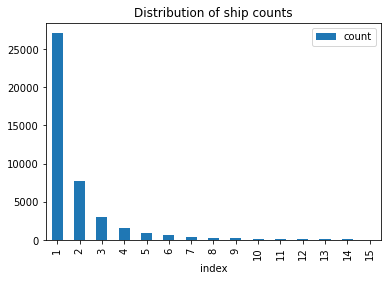

In [68]:
counts.plot(kind='bar', title='Distribution of ship counts');

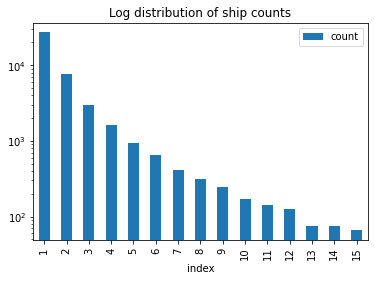

In [69]:
counts.plot(kind='bar', title='Log distribution of ship counts', logy=True);

## Let's visualize some images

In [71]:
train = os.listdir('./data/train_v2/')

In [72]:
len(train)

192556

In [74]:
train[:4]

['db4d6ecd4.jpg', '4be1d7b76.jpg', '6961eaf60.jpg', 'd0b573bd5.jpg']

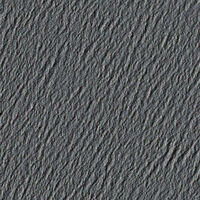

In [79]:
PIL.Image.open(f'./data/train_v2/{train[0]}').resize((200, 200))

Image to numpy array

In [81]:
img = PIL.Image.open(f'./data/train_v2/{train[0]}').resize((200, 200))
img_array = np.array(img)

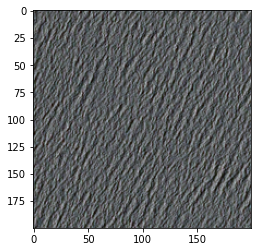

In [82]:
plt.imshow(img_array)